In [47]:
import numpy as np
import pandas as pd

In [48]:
df = pd.read_csv("/content/Task 3 and 4_Loan_Data.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               10000 non-null  int64  
 1   credit_lines_outstanding  10000 non-null  int64  
 2   loan_amt_outstanding      10000 non-null  float64
 3   total_debt_outstanding    10000 non-null  float64
 4   income                    10000 non-null  float64
 5   years_employed            10000 non-null  int64  
 6   fico_score                10000 non-null  int64  
 7   default                   10000 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 625.1 KB


In [4]:
df.describe()

customer_id  credit_lines_outstanding  loan_amt_outstanding  \
count  1.000000e+04              10000.000000          10000.000000   
mean   4.974577e+06                  1.461200           4159.677034   
std    2.293890e+06                  1.743846           1421.399078   
min    1.000324e+06                  0.000000             46.783973   
25%    2.977661e+06                  0.000000           3154.235371   
50%    4.989502e+06                  1.000000           4052.377228   
75%    6.967210e+06                  2.000000           5052.898103   
max    8.999789e+06                  5.000000          10750.677810   

       total_debt_outstanding         income  years_employed    fico_score  \
count            10000.000000   10000.000000    10000.000000  10000.000000   
mean              8718.916797   70039.901401        4.552800    637.557700   
std               6627.164762   20072.214143        1.566862     60.657906   
min                 31.652732    1000.000000        0.000000    408.000000   
25%               4199.836020   56539.867903        3.000000    597.000000   
50%               6732.407217   70085.826330        5.000000    638.000000   
75%              11272.263740   83429.166133        6.000000    679.000000   
max              43688.784100  148412.180500       10.000000    850.000000   

            default  
count  10000.000000  
mean       0.185100  
std        0.388398  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000

In [5]:
df.corr()

customer_id  credit_lines_outstanding  \
customer_id                  1.000000                  0.006729   
credit_lines_outstanding     0.006729                  1.000000   
loan_amt_outstanding        -0.013857                  0.080249   
total_debt_outstanding       0.003541                  0.852210   
income                      -0.008064                  0.022272   
years_employed              -0.008098                 -0.087900   
fico_score                   0.008044                 -0.258177   
default                      0.006927                  0.862815   

                          loan_amt_outstanding  total_debt_outstanding  \
customer_id                          -0.013857                0.003541   
credit_lines_outstanding              0.080249                0.852210   
loan_amt_outstanding                  1.000000                0.397403   
total_debt_outstanding                0.397403                1.000000   
income                                0.835815                0.394397   
years_employed                       -0.158416               -0.174353   
fico_score                           -0.031373               -0.232246   
default                               0.098978                0.758868   

                            income  years_employed  fico_score   default  
customer_id              -0.008064       -0.008098    0.008044  0.006927  
credit_lines_outstanding  0.022272       -0.087900   -0.258177  0.862815  
loan_amt_outstanding      0.835815       -0.158416   -0.031373  0.098978  
total_debt_outstanding    0.394397       -0.174353   -0.232246  0.758868  
income                    1.000000        0.001814   -0.010528  0.016309  
years_employed            0.001814        1.000000    0.255873 -0.284506  
fico_score               -0.010528        0.255873    1.000000 -0.324515  
default                   0.016309       -0.284506   -0.324515  1.000000

In [6]:
df.isnull().sum()

customer_id                 0
credit_lines_outstanding    0
loan_amt_outstanding        0
total_debt_outstanding      0
income                      0
years_employed              0
fico_score                  0
default                     0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.columns

Index(['customer_id', 'credit_lines_outstanding', 'loan_amt_outstanding',
       'total_debt_outstanding', 'income', 'years_employed', 'fico_score',
       'default'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               10000 non-null  int64  
 1   credit_lines_outstanding  10000 non-null  int64  
 2   loan_amt_outstanding      10000 non-null  float64
 3   total_debt_outstanding    10000 non-null  float64
 4   income                    10000 non-null  float64
 5   years_employed            10000 non-null  int64  
 6   fico_score                10000 non-null  int64  
 7   default                   10000 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 625.1 KB


In [10]:
df["Debt-to-income Ratio"] = df["loan_amt_outstanding"]/df["income"]

In [11]:
df["Debt-to-income Ratio"]

0       0.066909
1       0.073510
2       0.051058
3       0.064105
4       0.057395
          ...   
9995    0.071060
9996    0.051848
9997    0.080859
9998    0.064578
9999    0.062645
Name: Debt-to-income Ratio, Length: 10000, dtype: float64

In [12]:
from sklearn.model_selection import train_test_split
X = df
y  = df["default"]
x = df.drop("default",axis=1)
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report
clf = LogisticRegression(max_iter=1000,random_state=42)
clf.fit(X_train,Y_train)
y_pred = clf.predict(X_test)

acc = accuracy_score(Y_test,y_pred) * 100
print(f"{acc: .2f}%")
classification_rep = classification_report(Y_test, y_pred)
print(classification_rep)

 99.65%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1652
           1       1.00      0.98      0.99       348

    accuracy                           1.00      2000
   macro avg       1.00      0.99      0.99      2000
weighted avg       1.00      1.00      1.00      2000



In [24]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators = 100,random_state=42)
rf_classifier.fit(X_train,Y_train)
y_pred = rf_classifier.predict(X_test)

acc = accuracy_score(Y_test,y_pred) * 100
print(f"{acc: .2f}%")
classification_rep = classification_report(Y_test, y_pred)
print(classification_rep)

 99.35%
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1652
           1       0.99      0.97      0.98       348

    accuracy                           0.99      2000
   macro avg       0.99      0.99      0.99      2000
weighted avg       0.99      0.99      0.99      2000



In [32]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=100,learning_rate=0.1,random_state=100,max_features=5)
gbc.fit(X_train,Y_train)
y_pred = gbc.predict(X_test)

acc = accuracy_score(Y_test,y_pred) * 100
print(f"{acc: .2f}%")
classification_rep = classification_report(Y_test, y_pred)
print(classification_rep)

 99.60%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1652
           1       0.99      0.98      0.99       348

    accuracy                           1.00      2000
   macro avg       1.00      0.99      0.99      2000
weighted avg       1.00      1.00      1.00      2000



In [39]:
y_proba1 = clf.predict_proba(X_test)[:,1]
y_proba2 = rf_classifier.predict_proba(X_test)[:,1]
y_proba3 = gbc.predict_proba(X_test)[:,1]

In [42]:
from sklearn.metrics import roc_curve,roc_auc_score
import matplotlib.pyplot as plt
fpr1, tpr1, _ = roc_curve(Y_test, y_proba1)
fpr2, tpr2, _ = roc_curve(Y_test, y_proba2)
fpr3, tpr3, _ = roc_curve(Y_test, y_proba3)

In [44]:
auc1 = roc_auc_score(Y_test, y_proba1)
auc2 = roc_auc_score(Y_test, y_proba2)
auc3 = roc_auc_score(Y_test, y_proba3)

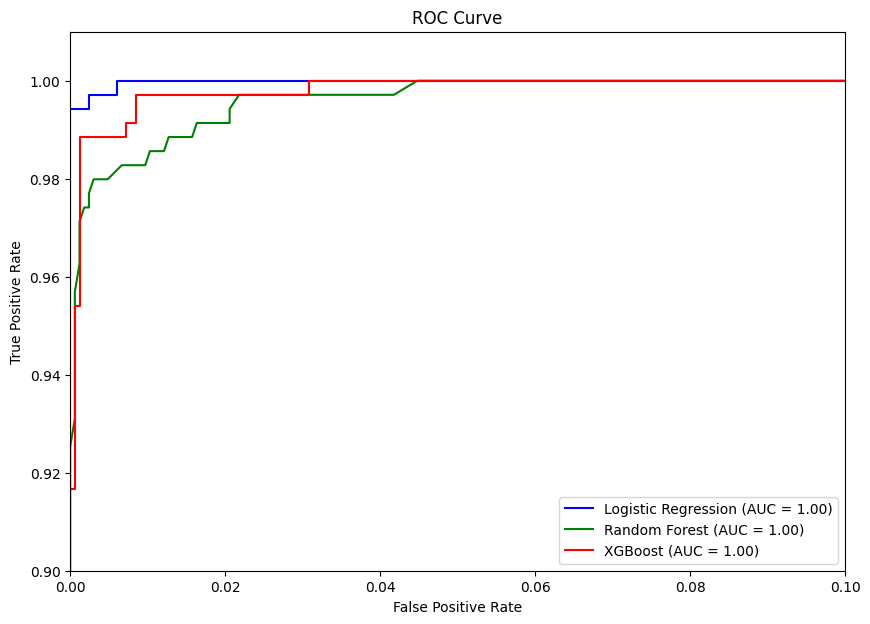

In [50]:
plt.figure(figsize=(10,7))
plt.plot(fpr1,tpr1,label=f'Logistic Regression (AUC = {auc1:.2f})',color="blue")
plt.plot(fpr2,tpr2,label=f'Random Forest (AUC = {auc2:.2f})',color="green")
plt.plot(fpr3,tpr3,label=f'XGBoost (AUC = {auc3:.2f})',color="red")
plt.plot([0,1],[0,1],linestyle="--",color="black")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.xlim(0.0,0.1)
plt.ylim(0.9,1.01)
plt.show()


In [51]:
print(f"Logistic Regression AUC: {auc1:.4f}")
print(f"Random Forest AUC: {auc2:.4f}")
print(f"XGBoost AUC: {auc3:.4f}")


Logistic Regression AUC: 1.0000
Random Forest AUC: 0.9996
XGBoost AUC: 0.9998


In [58]:
def compute_expected_loss(clf,df):
  pd_values = clf.predict_proba(df)[:,1]
  #exposure at default
  ead = df['loan_amt_outstanding'].values*1000
  #loss given default
  lgd = 0.90
  expected_loss = pd_values * lgd * ead
  return expected_loss

In [61]:
X_test = X_test[X_train.columns]

X_test["expected_loss"] = compute_expected_loss(clf,X_test)

In [62]:
X_test["expected_loss"]

6252    6.873889e-06
4684    5.504983e+03
1731    4.808874e+06
4742    1.647234e-08
4521    1.494107e-06
            ...     
6412    7.200310e-07
8285    1.954673e-09
7853    6.107533e-01
1095    4.180800e-07
6929    7.403453e+05
Name: expected_loss, Length: 2000, dtype: float64

In [63]:
top_risks = X_test[["loan_amt_outstanding","expected_loss"]].sort_values(by="expected_loss",ascending=False).head(10)
top_risks

loan_amt_outstanding  expected_loss
2138           9563.693515   8.607324e+06
9203           9105.964213   8.195368e+06
346            8638.366979   7.774530e+06
7475           8427.592750   7.584833e+06
2133           8276.572480   7.448915e+06
8080           8048.848585   7.243964e+06
2678           7715.114663   6.943603e+06
4362           7673.500532   6.906150e+06
7492           7605.778714   6.845201e+06
7428           7595.629034   6.836066e+06

In [64]:
def classify_risk(EL):
  if EL > 1_000_000:
    return "Very High Risk"
  elif EL > 100_000:
    return "High Risk"
  elif EL > 10_000:
    return "Moderate Risk"
  else:
    return "Less Risk"

X_test["risk_category"] = X_test["expected_loss"].apply(classify_risk)


In [65]:
X_test["risk_category"]

6252         Less Risk
4684         Less Risk
1731    Very High Risk
4742         Less Risk
4521         Less Risk
             ...      
6412         Less Risk
8285         Less Risk
7853         Less Risk
1095         Less Risk
6929         High Risk
Name: risk_category, Length: 2000, dtype: object

TASK 4:

In [69]:
fico_bins = [300,523,682,709,779,850]
fico__labels = ["Poor","Fair","Good","Very Good","Excellent"]
df["fico_bins"] = pd.cut(df["fico_score"],bins=fico_bins,labels=fico__labels,right=True)

In [71]:
df['fico_bins']

0            Fair
1            Fair
2            Fair
3            Fair
4            Fair
          ...    
9995         Good
9996         Fair
9997         Fair
9998         Fair
9999    Very Good
Name: fico_bins, Length: 10000, dtype: category
Categories (5, object): ['Poor' < 'Fair' < 'Good' < 'Very Good' < 'Excellent']

In [72]:
fico_encoded = pd.get_dummies(df["fico_bins"],prefix="fico")
df = pd.concat([df,fico_encoded],axis=1)

In [73]:
df

customer_id  credit_lines_outstanding  loan_amt_outstanding  \
0         8153374                         0           5221.545193   
1         7442532                         5           1958.928726   
2         2256073                         0           3363.009259   
3         4885975                         0           4766.648001   
4         4700614                         1           1345.827718   
...           ...                       ...                   ...   
9995      3972488                         0           3033.647103   
9996      6184073                         1           4146.239304   
9997      6694516                         2           3088.223727   
9998      3942961                         0           3288.901666   
9999      5533570                         1           1917.652480   

      total_debt_outstanding       income  years_employed  fico_score  \
0                3915.471226  78039.38546               5         605   
1                8228.752520  26648.43525               2         572   
2                2027.830850  65866.71246               4         602   
3                2501.730397  74356.88347               5         612   
4                1768.826187  23448.32631               6         631   
...                      ...          ...             ...         ...   
9995             2553.733144  42691.62787               5         697   
9996             5458.163525  79969.50521               8         615   
9997             4813.090925  38192.67591               5         596   
9998             1043.099660  50929.37206               2         647   
9999             3050.248203  30611.62821               6         757   

      default  fico_bins  fico_Poor  fico_Fair  fico_Good  fico_Very Good  \
0           0       Fair      False       True      False           False   
1           1       Fair      False       True      False           False   
2           0       Fair      False       True      False           False   
3           0       Fair      False       True      False           False   
4           0       Fair      False       True      False           False   
...       ...        ...        ...        ...        ...             ...   
9995        0       Good      False      False       True           False   
9996        0       Fair      False       True      False           False   
9997        0       Fair      False       True      False           False   
9998        0       Fair      False       True      False           False   
9999        0  Very Good      False      False      False            True   

      fico_Excellent  
0              False  
1              False  
2              False  
3              False  
4              False  
...              ...  
9995           False  
9996           False  
9997           False  
9998           False  
9999           False  

[10000 rows x 14 columns]

In [74]:
features = ["fico_Poor","fico_Fair","fico_Good","fico_Very Good","fico_Excellent"]
target = "default"
clf.fit(df[features],df[target])

LogisticRegression(max_iter=1000, random_state=42)

In [75]:
df["predicted_default"] = clf.predict_proba(df[features])[:,1]

In [76]:
df["predicted_default"]

0       0.204493
1       0.204493
2       0.204493
3       0.204493
4       0.204493
          ...   
9995    0.075596
9996    0.204493
9997    0.204493
9998    0.204493
9999    0.044791
Name: predicted_default, Length: 10000, dtype: float64

In [78]:
auc = roc_auc_score(df[target], df['predicted_default'])
print(f"AUC: {auc:.4f}")

AUC: 0.6340


In [81]:
from sklearn.preprocessing import KBinsDiscretizer

n_buckets = 10
kbin = KBinsDiscretizer(n_bins=n_buckets, encode='ordinal', strategy='quantile')
df['fico_bucket'] = kbin.fit_transform(df[['fico_score']]).astype(int)
df['rating'] = n_buckets - df['fico_bucket']

In [82]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_leaf_nodes=10)
tree.fit(df[['fico_score']], df['default'])

thresholds = tree.tree_.threshold[tree.tree_.threshold > 0]
boundaries = sorted(set(thresholds.tolist() + [df['fico_score'].min(), df['fico_score'].max()]))
df['fico_bucket'] = pd.cut(df['fico_score'], bins=boundaries, labels=False)


In [83]:
bucket_pd = df.groupby('fico_bucket')['default'].mean()
sorted_buckets = bucket_pd.sort_values().index
bucket_to_rating = {bucket: i+1 for i, bucket in enumerate(sorted_buckets)}
df['rating'] = df['fico_bucket'].map(bucket_to_rating)


In [84]:
df["rating"]

0       4.0
1       5.0
2       4.0
3       3.0
4       3.0
       ... 
9995    1.0
9996    3.0
9997    4.0
9998    2.0
9999    1.0
Name: rating, Length: 10000, dtype: float64